Looking at power usage by hour of the day, just for grins/curiosity. This doesn't affect the overall project at this point. 

In [18]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


HISTORICAL_DATA_DIR = os.path.abspath("./historical_data")
ELECTRIC_DATA_DIR = os.path.join(HISTORICAL_DATA_DIR, "electric_data")
psco_demand_data_file = os.path.join(ELECTRIC_DATA_DIR, "psco-hourly-dataframe.json")

with open(psco_demand_data_file, "r", encoding="utf-8") as f:
    df = pd.read_json(f)

df.index.rename("date", inplace=True)
df["tmp_date"] = df.index
df["utc_hour_of_day"] = df["tmp_date"].dt.hour
df.drop("tmp_date", axis=1, inplace=True)

grouped = df.groupby(["utc_hour_of_day"], sort=True).agg(
    sum=("demand", np.sum),
    median=("demand", np.median),
    mean=("demand", np.mean),
    min=("demand", np.min),
    max=("demand", np.max),
)
grouped



,sum,median,mean,min,max
utc_hour_of_day,,,,,
0,1.589154e+07,5679.0,5945.206226,4213.0,8439.0
1,1.616156e+07,5885.0,6048.486512,4333.0,8444.0
2,1.605484e+07,5883.5,6008.548027,4364.0,8439.0
3,1.573060e+07,5766.0,5887.201585,4273.0,8378.0
4,1.511485e+07,5577.5,5656.754042,4097.0,8378.0
5,1.410913e+07,5229.5,5280.362725,3869.0,7616.0
6,1.308884e+07,4862.0,4898.516816,3655.0,6921.0
7,1.233529e+07,4574.0,4614.772004,3513.0,6422.0
8,1.186447e+07,4391.0,4438.634792,3400.0,6110.0


demand    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

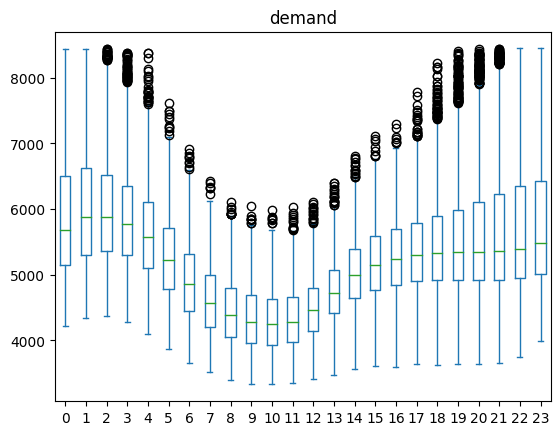

In [20]:
df.plot.box(by="utc_hour_of_day")
